In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [2]:
set_pretty_prints()

In [3]:
df = load_dataset('imobiliare.ro')

In [4]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [5]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

# TODO: select viable features
START = 1
END = 9
X = df.iloc[:,START:END]


In [6]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [7]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

## Exploration

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

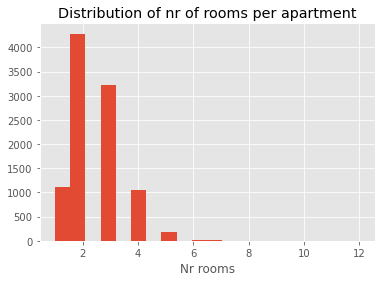

In [8]:
field = 'nr cam'
x_label = 'Nr rooms'
title = 'Distribution of nr of rooms per apartment'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 1.0, 'Distribution of sqm per property')

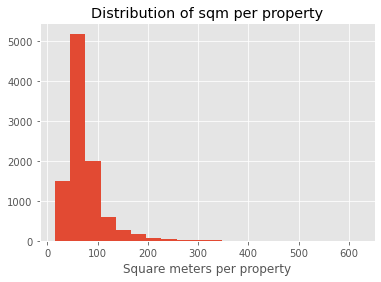

In [9]:
# TODO: Analyse a few more features
field = 'mp'
x_label = 'Square meters per property'
title = 'Distribution of sqm per property'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

Text(0.5, 0, 'Price')

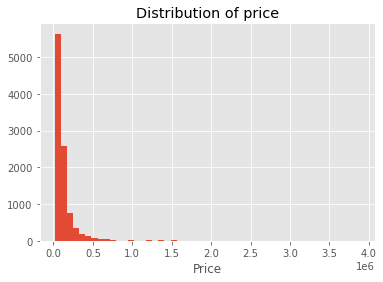

In [14]:
# TODO: Analyse target distribution
target = y_price
title = 'Distribution of price'
x_label = 'Price'
plt.hist(target, bins=50)
plt.title(title)
plt.xlabel(x_label)

Text(0.5, 0, 'Price')

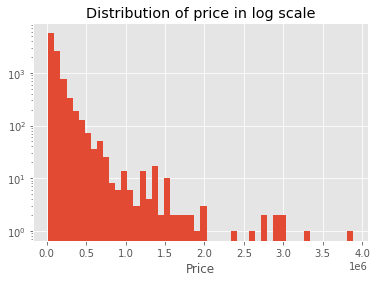

In [15]:
# TODO: Re-display the target distribution
target = y_price
title = "Distribution of price in log scale"
x_label = "Price"
plot_param = 'log'
plot_param_value = True
kwargs = {plot_param : plot_param_value}
plt.hist(target, bins=50, **kwargs)
plt.title(title)
plt.xlabel(x_label)

In [16]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [17]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [18]:
df_new = df[new_corr_features]

In [19]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Modelling
- further process X data maybe
- construct normal eq and determine model coefs `(((XtX)^-1)Xt)y (y = x*w => w = y/x)`
- validate results (how, when)

`f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1`

In [20]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [21]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [22]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [23]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [24]:
np_X = X.values

In [26]:
np_X[:20]

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [27]:
np_X.mean(axis=0)

array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [28]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [30]:
np_X_n[:20]

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

In [37]:
np_y = y_price.values
np_y[:20]

array([  35800,   35800,   39600,   29800,  112900,   37400,   39500, 2350000,  332000,   39900,   39500,   42766,   88253,   26800,   93000,  135000,  115000,   39500,   55192,   69900], dtype=int64)

In [38]:

np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n[:20]

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.6 , 0.08, 0.01, 0.01, 0.01, 0.02, 0.  , 0.02, 0.03, 0.03, 0.01, 0.01, 0.01])

In [39]:
np_y.min()


18000

In [40]:
np_y.max()

3880000

In [41]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()
y_test = np_y_n * y_norm_div + y_norm_sub
y_test[:20]

array([  35800.,   35800.,   39600.,   29800.,  112900.,   37400.,   39500., 2350000.,  332000.,   39900.,   39500.,   42766.,   88253.,   26800.,   93000.,  135000.,  115000.,   39500.,   55192.,   69900.])

In [43]:
# TODO: write normal eq for raw data
np_weights = np.linalg.pinv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y)

# TODO: write normal eq for normalized data
np_weights_n = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)


In [44]:
np_weights

array([-35253.17,   4068.76, -77652.97, -77536.51, -76809.97,   2762.81, -18637.49,   7934.74])

In [45]:
np_weights_n

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ])

In [ ]:
#TODO: calc predictions for raw data model
np_y_preds = None

#TODO: calc predictions for normalized data model
np_y_preds_n = None

In [ ]:
np_y_preds

In [ ]:
plt.figure()
plt.hist(np_y_preds)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_preds_n)
plt.title('Normed data model predictions')

### One more model before testing results

Lets further improve model by adding bias

In [ ]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

In [ ]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

In [ ]:
# TODO: calculate weights
np_weights_nb = None
np_weights_nb

In [ ]:
# TODO: calculate predictions
np_y_preds_nb = None
np_y_preds_nb

In [ ]:
plt.hist(np_y_preds_nb, bins=50)

In [ ]:
np_y_pred_price = np_y_pred
np_y_pred_n_price = None
np_y_pred_nb_price = None

### Now lets prepare some friendly calitative analysis outputs

Raw model

In [ ]:
df_result_raw = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_price.round(0),
    }
)
df_result_raw.head(10)
df_result_raw.tail(10)

Normed data model

In [ ]:
df_result_n = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_n_price.round(0),
    }
)
df_result_n.head(10)
df_result_n.tail(10)

Normed & bias added

In [ ]:

df_result_nb = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
    }
)
df_result_nb.head(10)
df_result_nb.head(10)

Now lets see some quantitative analysis of the results

In [ ]:
# TODO: complete code below
abs_err = np.abs(y_price - None)
abs_err

In [ ]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [ ]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred2_price.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

In [ ]:
df_result.tail(20)

In [ ]:
proc_err.mean()

In [ ]:
def train_neq(inputs, gold):
    # TODO:
    weights = np.linalg.pinv(inputs.T.dot(inputs)).dot(inputs.T).dot(gold)
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [ ]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [ ]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [ ]:
theta

In [ ]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

In [ ]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)